###### Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2018  by D. Koehn, heterogeneous models are from [this Jupyter notebook](https://nbviewer.jupyter.org/github/krischer/seismo_live/blob/master/notebooks/Computational%20Seismology/The Finite-Difference Method/fd_ac2d_heterogeneous.ipynb) by Heiner Igel ([@heinerigel](https://github.com/heinerigel)), Florian Wölfl and Lion Krischer ([@krischer](https://github.com/krischer)) which is a supplemenatry material to the book [Computational Seismology: A Practical Introduction](http://www.computational-seismology.org/), notebook style sheet by L.A. Barba, N.C. Clementi

In [1]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = '../style/custom.css'
HTML(open(css_file, "r").read())

# Viscoelasticity: Introduction

As introduction, we first distinguish different elastic "damping" effects of seismic waves and non-elastic damping. How can we describe seismic damping and what are the reasons?

In [2]:
# Import Libraries 
# ----------------
import numpy as np
from numba import jit
import matplotlib
import matplotlib.pyplot as plt
from tew2.FD_2DAC import FD_2D_acoustic_JIT
from pylab import rcParams

# Ignore Warning Messages
# -----------------------
import warnings
warnings.filterwarnings("ignore")

from mpl_toolkits.axes_grid1 import make_axes_locatable

## "Damping" of elastic waves

Even without the incorporation of viscoelastic effects, seismic waves can be damped.

Due to **geometrical spreading** the seismic energy is distributed over the surface of the wavefront, as we can see in the acoustic modelling result below:

nx =  400
nz =  400
nt =  578


<IPython.core.display.Javascript object>


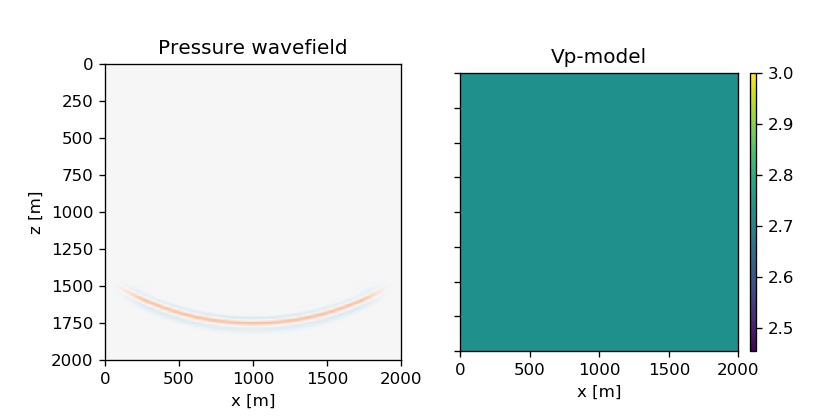

In [3]:
%matplotlib notebook
time, seis_hom = FD_2D_acoustic_JIT('hom')

Another way to damp the seismic wavefield is by **scattering** the seismic energy at small scale structures like the random medium in this acoustic example:

nx =  400
nz =  400
nt =  890


<IPython.core.display.Javascript object>


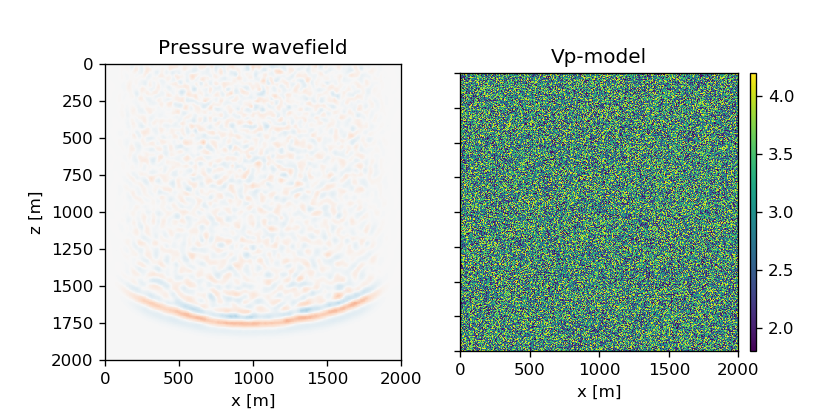

In [4]:
%matplotlib notebook
time_rand, seis_rand = FD_2D_acoustic_JIT('rand')

By comparing the seismograms for the homogeneous with the random medium we recongnize a significant amplitude difference. Note also the significant seismic coda

<IPython.core.display.Javascript object>


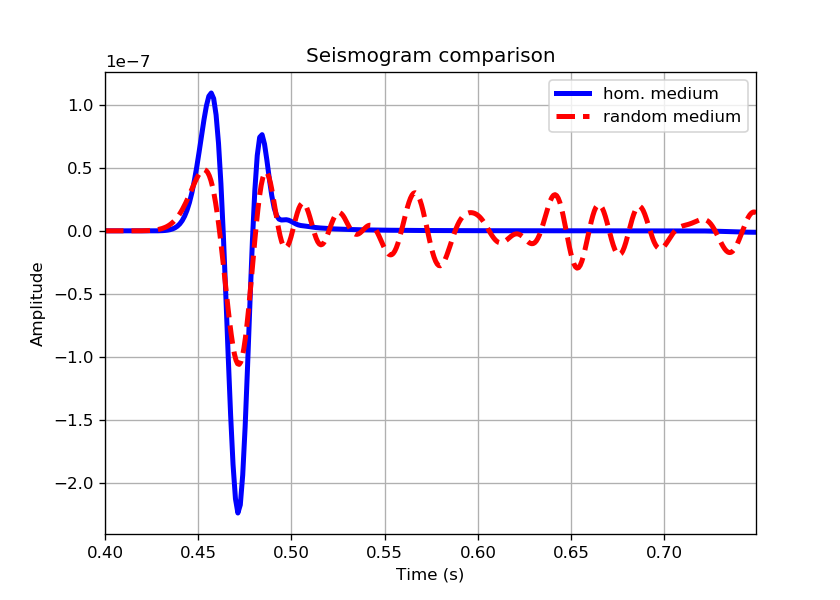

In [5]:
%matplotlib notebook
# Compare FD seismograms
# ----------------------
# Define figure size
rcParams['figure.figsize'] = 7, 5

# plot seismogram hom. model
plt.plot(time, seis_hom, 'b-',lw=3,label="hom. medium") 

# plot seismogram random model
plt.plot(time_rand, seis_rand, 'r--',lw=3,label="random medium")
plt.xlim(0.4, time[-1])
plt.title('Seismogram comparison')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

## Non-elastic damping effects

Compared to the elastic damping effects described above, **intrinsic damping** is based on the conversion of seismic energy to heat or irreversible medium deformations. We can quantify the damping of seismic waves by ...

* ... a damping coefficient $\alpha$, which describes the displacement of a plane wave as

\begin{equation}
u(t) = u(0) exp(-\alpha x)\notag
\end{equation}

where $x$ denotes the path length of the seismic wave

* ... the quality factor Q which defines the absorption of seismic waves by

\begin{equation}
\frac{1}{Q} = \frac{\Delta E}{2 \pi E_0}\notag
\end{equation}

which is a measure of the absorbed energy per cycle $\Delta E / 2 \pi$ with respect to the maximum elastic energy stored in one deformation cycle $E_0$. In case of seismic waves, the **quality factor is constant for all frequencies** $\mathbf{Q(\omega)=const}$. This implies a stronger absorption of higher frequency waves due to their larger number of cycles compared to lower frequencies. The problem with this definition is that $E_0$ is not easy to define without an additional model.

In the following lessons we will describe **viscoelastic effects** by macroscopic, mathematical-physical models. A more detailed understanding of the seismic damping could be achieved by petrophysical models which are unfortunately beyond the scope of the TEW2 lectures.

## What we learned:

- Differences between elastic "damping" (geometrical spreading/scattering of seismic energy) and non-elastic (visco-elastic) damping effects
- How to quantify damping effects by the damping coefficient or the quality factor Q
- The frequency-independent Q in seismic wave propagation implies that higher frequencies are stronger damped than lower frequencies